<a href="https://colab.research.google.com/github/mardzallyna/TD/blob/main/TbDetectionDraft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
Please upload your kaggle.json file (from your Kaggle account settings)


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/tawsifurrahman/tuberculosis-tb-chest-xray-dataset
License(s): copyright-authors
 98% 653M/663M [00:06<00:00, 92.3MB/s]
100% 663M/663M [00:06<00:00, 102MB/s] 
Archive:  tuberculosis-tb-chest-xray-dataset.zip
  inflating: TB_Chest_Radiography_Database/Normal.metadata.xlsx  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-10.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-100.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1000.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1001.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1002.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1003.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1004.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1005.png  
  inflating: TB_Chest_Radiography_Database

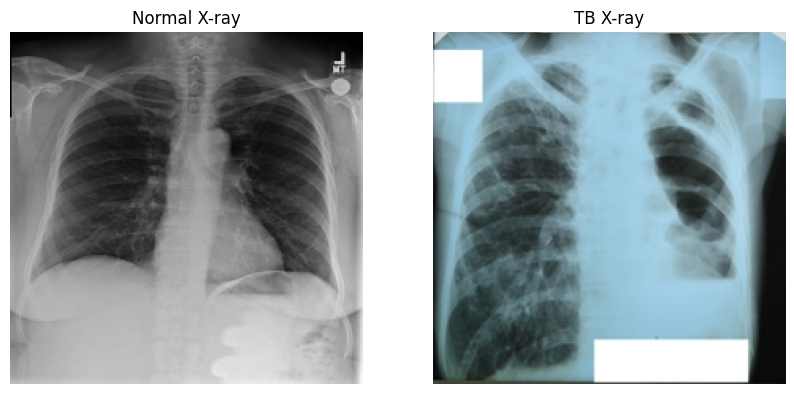

Loading normal images...
Loading TB images...
Dataset loaded: 1000 images, 500 TB cases, 500 normal cases
Training set: 800 images
Testing set: 200 images
Final training set: 640 images
Validation set: 160 images
Training set: 320 TB cases (50.0%)
Validation set: 80 TB cases (50.0%)
Testing set: 100 TB cases (50.0%)


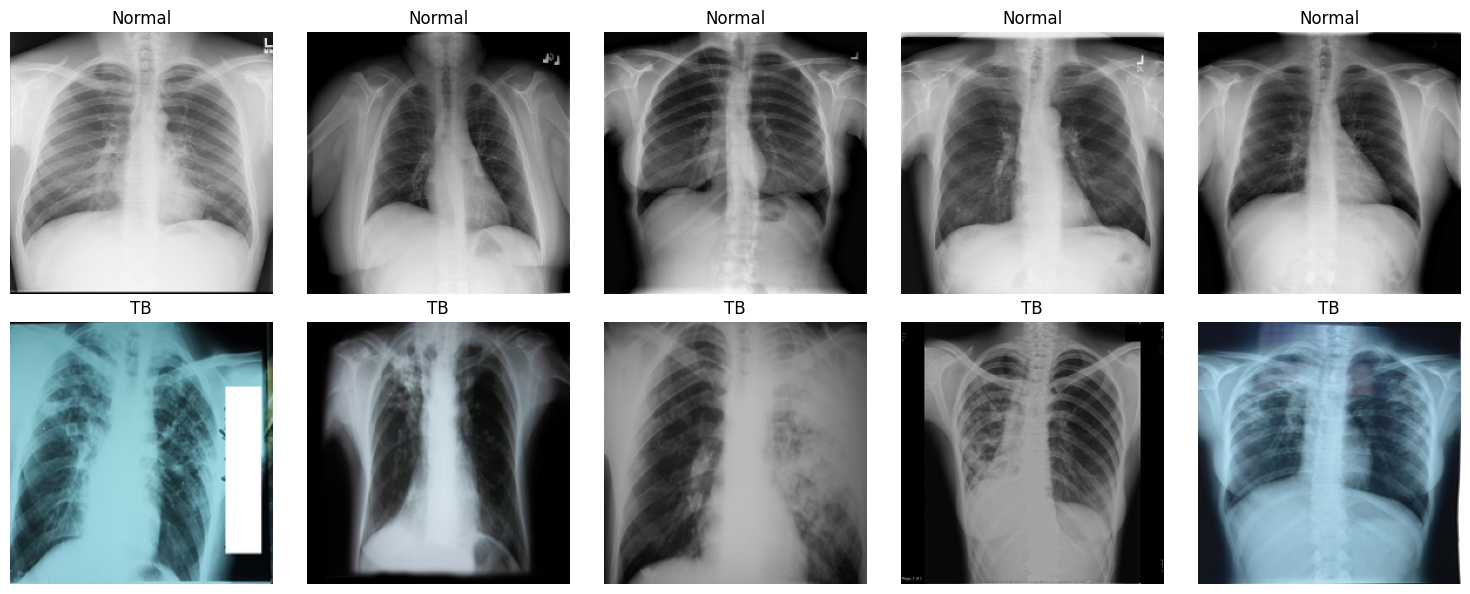

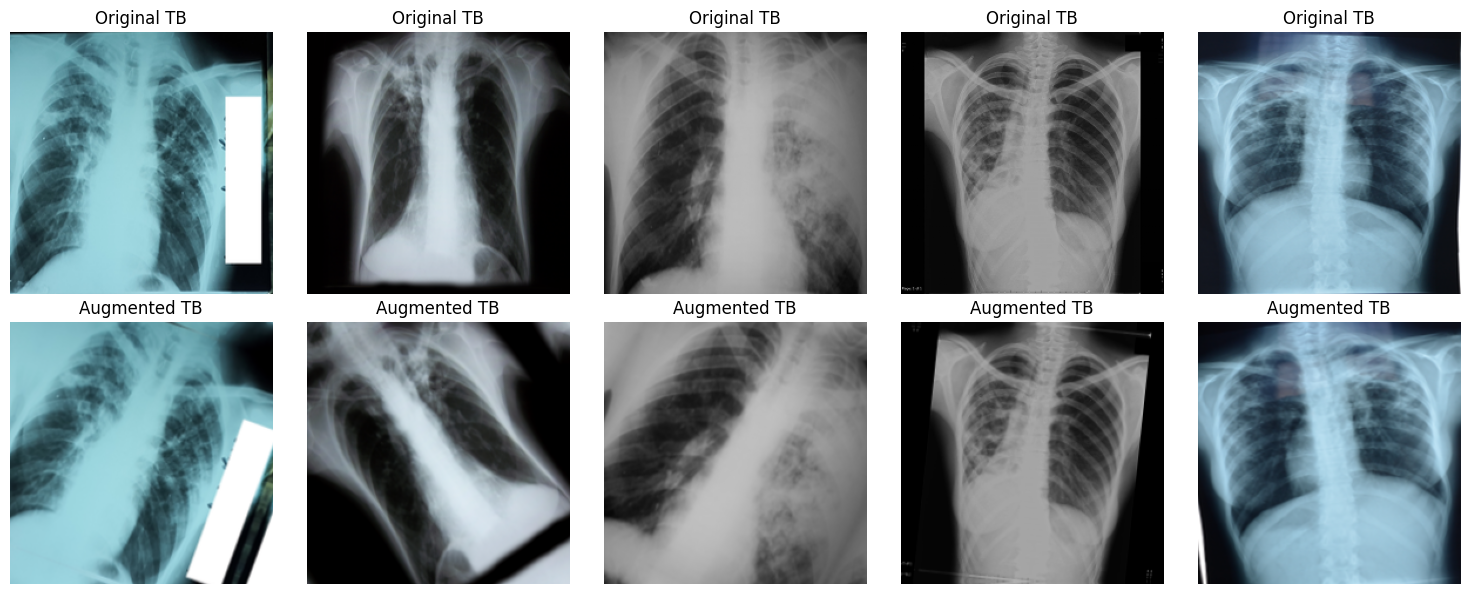

Data preparation complete.


In [ ]:
# Install necessary packages
!pip install opencv-python-headless
!pip install tensorflow keras scikit-learn matplotlib kaggle

# Import libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from google.colab import drive, files

# Mount Google Drive for saving results
drive.mount('/content/drive')

# Set up Kaggle API credentials
# You'll need to upload your kaggle.json file
print("Please upload your kaggle.json file (from your Kaggle account settings)")
files.upload()  # This will prompt you to upload your kaggle.json

# Set up Kaggle API
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the TB dataset from Kaggle
!kaggle datasets download -d tawsifurrahman/tuberculosis-tb-chest-xray-dataset
!unzip tuberculosis-tb-chest-xray-dataset.zip

# Define data directories
normal_dir = 'TB_Chest_Radiography_Database/Normal'
tb_dir = 'TB_Chest_Radiography_Database/Tuberculosis'

# Verify the directories exist
print(f"Normal directory exists: {os.path.exists(normal_dir)}")
print(f"TB directory exists: {os.path.exists(tb_dir)}")

# Function to load and preprocess a single image
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Failed to load image: {image_path}")
        return None
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, target_size)
    img = img / 255.0  # Normalize pixel values
    return img

# Display sample images to verify loading
normal_samples = os.listdir(normal_dir)[:1]
tb_samples = os.listdir(tb_dir)[:1]

if normal_samples and tb_samples:
    normal_img_path = os.path.join(normal_dir, normal_samples[0])
    tb_img_path = os.path.join(tb_dir, tb_samples[0])

    normal_img = load_and_preprocess_image(normal_img_path)
    tb_img = load_and_preprocess_image(tb_img_path)

    if normal_img is not None and tb_img is not None:
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(normal_img)
        plt.title('Normal X-ray')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(tb_img)
        plt.title('TB X-ray')
        plt.axis('off')

        plt.show()

# Load all images and labels
def load_dataset(normal_dir, tb_dir, max_images=None):
    images = []
    labels = []

    # Load normal images
    print("Loading normal images...")
    normal_files = os.listdir(normal_dir)
    if max_images:
        normal_files = normal_files[:max_images]

    for filename in normal_files:
        image_path = os.path.join(normal_dir, filename)
        img = load_and_preprocess_image(image_path)

        if img is not None:
            images.append(img)
            labels.append(0)  # 0 for normal

    # Load TB images
    print("Loading TB images...")
    tb_files = os.listdir(tb_dir)
    if max_images:
        tb_files = tb_files[:max_images]

    for filename in tb_files:
        image_path = os.path.join(tb_dir, filename)
        img = load_and_preprocess_image(image_path)

        if img is not None:
            images.append(img)
            labels.append(1)  # 1 for TB

    return np.array(images), np.array(labels)

# Load dataset with an optional limit for testing
# Set max_images=None to load all images
X, y = load_dataset(normal_dir, tb_dir, max_images=500)
print(f"Dataset loaded: {len(X)} images, {sum(y)} TB cases, {len(X) - sum(y)} normal cases")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training set: {len(X_train)} images")
print(f"Testing set: {len(X_test)} images")

# Further split training into training and validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)
print(f"Final training set: {len(X_train)} images")
print(f"Validation set: {len(X_val)} images")

# Verify class distribution
print(f"Training set: {sum(y_train)} TB cases ({sum(y_train)/len(y_train)*100:.1f}%)")
print(f"Validation set: {sum(y_val)} TB cases ({sum(y_val)/len(y_val)*100:.1f}%)")
print(f"Testing set: {sum(y_test)} TB cases ({sum(y_test)/len(y_test)*100:.1f}%)")

# Data augmentation for training data (optional, if needed to balance classes)
def create_data_augmentation():
    return tf.keras.Sequential([
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
        layers.RandomContrast(0.1),
    ])

# Display some sample images from the training set
def display_samples(images, labels, num_samples=5):
    plt.figure(figsize=(15, 6))

    # Get indices for normal and TB cases
    normal_indices = np.where(labels == 0)[0]
    tb_indices = np.where(labels == 1)[0]

    # Display normal samples
    for i in range(min(num_samples, len(normal_indices))):
        plt.subplot(2, num_samples, i + 1)
        plt.imshow(images[normal_indices[i]])
        plt.title('Normal')
        plt.axis('off')

    # Display TB samples
    for i in range(min(num_samples, len(tb_indices))):
        plt.subplot(2, num_samples, i + num_samples + 1)
        plt.imshow(images[tb_indices[i]])
        plt.title('TB')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Display sample images
display_samples(X_train, y_train)

# Display augmented samples (optional)
def display_augmented_samples(images, labels, augmentation_model, num_samples=5):
    plt.figure(figsize=(15, 6))

    # Get indices for TB cases
    tb_indices = np.where(labels == 1)[0][:num_samples]

    for i, idx in enumerate(tb_indices):
        # Original image
        plt.subplot(2, num_samples, i + 1)
        plt.imshow(images[idx])
        plt.title('Original TB')
        plt.axis('off')

        # Augmented image
        aug_img = augmentation_model(tf.expand_dims(images[idx], 0))[0]
        plt.subplot(2, num_samples, i + num_samples + 1)
        plt.imshow(aug_img)
        plt.title('Augmented TB')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Create and display augmentation examples
augmentation_model = create_data_augmentation()
display_augmented_samples(X_train, y_train, augmentation_model)

# Save processed data to drive for future use (optional)
save_data = False  # Set to True if you want to save the processed data
if save_data:
    os.makedirs('/content/drive/MyDrive/tb_detection', exist_ok=True)
    np.save('/content/drive/MyDrive/tb_detection/X_train.npy', X_train)
    np.save('/content/drive/MyDrive/tb_detection/y_train.npy', y_train)
    np.save('/content/drive/MyDrive/tb_detection/X_val.npy', X_val)
    np.save('/content/drive/MyDrive/tb_detection/y_val.npy', y_val)
    np.save('/content/drive/MyDrive/tb_detection/X_test.npy', X_test)
    np.save('/content/drive/MyDrive/tb_detection/y_test.npy', y_test)
    print("Data saved to Google Drive")

print("Data preparation complete.")

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

# Define CNN model
def build_cnn_model(input_shape=(224, 224, 3)):
    model = models.Sequential([
        # Convolutional Layer 1
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),

        # Convolutional Layer 2
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        # Convolutional Layer 3
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        # Flatten & Fully Connected Layers
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')  # Output layer (Binary classification)
    ])
    return model

# Compile the model
def compile_model(model):
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Early stopping to prevent overfitting
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Build and compile CNN model
cnn_model = build_cnn_model()
cnn_model = compile_model(cnn_model)

# Ensure dataset is loaded (Replace with actual dataset loading code)
# Example:
# X_train, X_val, X_test, y_train, y_val, y_test = load_your_data_function()

# Train the model
history = cnn_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)

# Evaluate model on test data
test_loss, test_acc = cnn_model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')

# Ensure save directory exists
import os
os.makedirs('/content/drive/MyDrive/tb_detection', exist_ok=True)

# Save the trained model
cnn_model.save('/content/drive/MyDrive/tb_detection/cnn_tb_model.keras')
print("Model saved successfully!")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 79s 4s/step - accuracy: 0.5225 - loss: 1.0721 - val_accuracy: 0.8125 - val_loss: 0.3989
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 77s 4s/step - accuracy: 0.8770 - loss: 0.3071 - val_accuracy: 0.8375 - val_loss: 0.3474
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 77s 4s/step - accuracy: 0.8713 - loss: 0.2921 - val_accuracy: 0.8625 - val_loss: 0.3666
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 81s 4s/step - accuracy: 0.8798 - loss: 0.3226 - val_accuracy: 0.8813 - val_loss: 0.3147
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 77s 4s/step - accuracy: 0.9263 - loss: 0.1872 - val_accuracy: 0.8687 - val_loss: 0.3166
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 86s 4s/step - accuracy: 0.9290 - loss: 0.1855 - val_accuracy: 0.9062 - val_loss: 0.3093
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 78s 4s/step - accuracy: 0.9231 - loss: 0.1708 - val_accuracy: 0.9250 - val_loss: 0.2854
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 82s 4s/step - accuracy: 0.9692 - loss: 0.1070 - val_accuracy: 0.9187 - val_loss:

In [ ]:
from tensorflow import keras

# Load the model
loaded_model = keras.models.load_model('/content/drive/MyDrive/tb_detection/cnn_tb_model.keras')

# ✅ Fix the warning by recompiling
loaded_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Now you can use `loaded_model` for predictions without warnings



In [ ]:
from google.colab import files
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import os

# Load the trained TB detection model
model_path = '/content/drive/MyDrive/tb_detection/cnn_tb_model.keras'
model = tf.keras.models.load_model(model_path)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

def preprocess_image(img_path):
    try:
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)
        return img_array
    except Exception as e:
        print(f"❌ Error loading image: {e}")
        return None

def classify_xray(img_path):
    img_array = preprocess_image(img_path)
    if img_array is None:
        return "❌ Invalid image file."

    prediction = model.predict(img_array)[0][0]
    confidence = prediction * 100  # Convert to percentage

    if confidence < 70:
        return "⚠️ This image may not be a chest X-ray. Please upload a valid chest X-ray."

    if prediction > 0.5:
        return f"⚠️ Tuberculosis Detected ({confidence:.2f}% confidence)"
    else:
        confidence = (1 - prediction) * 100  # Adjust for 'No TB' case
        return f"✅ No Tuberculosis Detected ({confidence:.2f}% confidence)"

# Upload an image
uploaded = files.upload()

for img_name in uploaded.keys():
    img_path = f"/content/{img_name}"  # Ensure correct path
    result = classify_xray(img_path)
    print(result)

    # Optional: Delete the file after processing to free space
    os.remove(img_path)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')